In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos un estilo visual para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
df = pd.read_excel("./data/BD_IPSA_1940.xlsx")
df.head(3)

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3


In [4]:
# 1. Mostrar información básica del DataFrame
print("Información del DataFrame:")
print(f"Forma del DataFrame: {df.shape}")
print(df.info())
df.describe()



Información del DataFrame:
Forma del DataFrame: (2187, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2187 non-null   int64  
 1   NOME            2187 non-null   object 
 2   FAZ             2187 non-null   int64  
 3   TAL             2187 non-null   object 
 4   tipocorte       2187 non-null   object 
 5   variedad        2187 non-null   object 
 6   madurada        2187 non-null   object 
 7   producto        2187 non-null   object 
 8   dosismad        2187 non-null   float64
 9   semsmad         2187 non-null   float64
 10  edad            2187 non-null   float64
 11  cortes          2187 non-null   int64  
 12  me              2187 non-null   float64
 13  vejez           2187 non-null   float64
 14  sacarosa        2187 non-null   float64
 15  mes             2187 non-null   int64  
 16  periodo         218

,Unnamed: 0,FAZ,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,2126.506630,80588.332876,0.993278,9.164838,12.766118,2.794239,9.197759,4.172154,12.777732,6.758573,201887.691358,142.393233,118.051212,2.435299,4.317284
std,1228.561661,572.818299,0.309096,3.441579,1.117866,1.621195,1.574409,6.339255,0.854397,3.482444,131.982686,25.838029,144.424675,0.704058,2.591956
min,11.000000,80100.000000,0.000000,-1.600000,10.300000,1.000000,3.400000,0.200000,9.200000,1.000000,201407.000000,6.000000,0.000000,1.000000,0.200000
25%,1038.000000,80222.000000,0.800000,7.100000,12.000000,1.000000,8.200000,2.100000,12.200000,4.000000,201807.000000,126.000000,0.000000,2.000000,2.900000
50%,2219.000000,80396.000000,1.000000,8.700000,12.500000,2.000000,9.100000,2.600000,12.800000,7.000000,201908.000000,144.000000,77.000000,3.000000,3.700000
75%,3223.500000,80660.000000,1.200000,10.600000,13.300000,4.000000,10.100000,3.300000,13.300000,10.000000,202005.000000,159.000000,171.500000,3.000000,5.000000
max,4222.000000,82519.000000,9.000000,45.000000,21.100000,14.000000,15.000000,102.900000,16.000000,12.000000,202101.000000,249.000000,1468.000000,3.000000,25.500000


In [5]:
# Imports necesarios para preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# 2. Categorización usando terciles
q33_sac = df['sacarosa'].quantile(0.33)
q67_sac = df['sacarosa'].quantile(0.67)
q33_tch = df['TCH'].quantile(0.33)
q67_tch = df['TCH'].quantile(0.67)

df['sacarosa_cat'] = pd.cut(df['sacarosa'],
                           bins=[-np.inf, q33_sac, q67_sac, np.inf],
                           labels=['Baja', 'Media', 'Alta'])

df['TCH_cat'] = pd.cut(df['TCH'],
                      bins=[-np.inf, q33_tch, q67_tch, np.inf],
                      labels=['Baja', 'Media', 'Alta'])

# Verificar balance
print("Sacarosa:", df['sacarosa_cat'].value_counts().sort_index())
print("TCH:", df['TCH_cat'].value_counts().sort_index())

Sacarosa: sacarosa_cat
Baja     761
Media    710
Alta     716
Name: count, dtype: int64
TCH: TCH_cat
Baja     722
Media    762
Alta     703
Name: count, dtype: int64


In [7]:
# 3. Eliminar variables categóricas
df_clean = df.drop(columns=['tipocorte', 'variedad', 'madurada', 'producto', 'NOME', 'Unnamed: 0'])

# Preparar datasets para entrenamiento
X = df_clean.drop(columns=['sacarosa', 'TCH', 'sacarosa_cat', 'TCH_cat'])
y_sacarosa = df_clean['sacarosa_cat']
y_tch = df_clean['TCH_cat']



In [8]:
# 4. Feature Selection
from sklearn.feature_selection import VarianceThreshold

# Eliminar variables numéricas con varianza muy baja
variance_selector = VarianceThreshold(threshold=0.01)
X_numeric = df_clean.select_dtypes(include=np.number).drop(columns=['sacarosa', 'TCH'])
high_variance_cols = X_numeric.columns[variance_selector.fit(X_numeric).get_support()]

print(f"Variables eliminadas por baja varianza: {set(X_numeric.columns) - set(high_variance_cols)}")
print(f"Variables mantenidas (alta varianza): {list(high_variance_cols)}")

Variables eliminadas por baja varianza: set()
Variables mantenidas (alta varianza): ['FAZ', 'dosismad', 'semsmad', 'edad', 'cortes', 'me', 'vejez', 'mes', 'periodo', 'lluvias', 'grupo_tenencia', 'pct_diatrea']


In [9]:
print("Las columnas finales en el DataFrame de características (X) son:")
print(X.columns)

Las columnas finales en el DataFrame de características (X) son:
Index(['FAZ', 'TAL', 'dosismad', 'semsmad', 'edad', 'cortes', 'me', 'vejez',
       'mes', 'periodo', 'lluvias', 'grupo_tenencia', 'pct_diatrea'],
      dtype='object')


In [10]:
# 5. Convertir variables categóricas a string
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

for col in categorical_features:
    X[col] = X[col].astype(str)


In [11]:
# 6. Separar las x y las y de los conjuntos
X_train, X_test, y_train_sac, y_test_sac = train_test_split(
    X, y_sacarosa, test_size=0.2, random_state=42, stratify=y_sacarosa
)

# Extraer las y correspondientes usando los mismos índices
y_train_tch = y_tch[X_train.index]
y_test_tch = y_tch[X_test.index]

# Verificar balances
print("Balance train sacarosa:", y_train_sac.value_counts().sort_index())
print("Balance test sacarosa:", y_test_sac.value_counts().sort_index())
print("\nBalance train TCH:", y_train_tch.value_counts().sort_index())
print("Balance test TCH:", y_test_tch.value_counts().sort_index())

Balance train sacarosa: sacarosa_cat
Baja     608
Media    568
Alta     573
Name: count, dtype: int64
Balance test sacarosa: sacarosa_cat
Baja     153
Media    142
Alta     143
Name: count, dtype: int64

Balance train TCH: TCH_cat
Baja     581
Media    601
Alta     567
Name: count, dtype: int64
Balance test TCH: TCH_cat
Baja     141
Media    161
Alta     136
Name: count, dtype: int64


In [12]:
# 7. Pipelines de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)



In [13]:
# 8. Entrenamiento con GridSearchCV + Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression (sin cambios)
lr_sac = Pipeline([('preprocessor', preprocessor),
                   ('classifier', LogisticRegression(random_state=42, max_iter=1000))])
lr_tch = Pipeline([('preprocessor', preprocessor),
                   ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# KNN con GridSearchCV (mantener)
knn_pipeline = Pipeline([('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Random Forest
rf_pipeline = Pipeline([('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(random_state=42))])
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# GridSearch para todos los modelos
grid_knn_sac = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn_tch = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_sac = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_tch = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar todos
lr_sac.fit(X_train, y_train_sac)
lr_tch.fit(X_train, y_train_tch)
grid_knn_sac.fit(X_train, y_train_sac)
grid_knn_tch.fit(X_train, y_train_tch)
grid_rf_sac.fit(X_train, y_train_sac)
grid_rf_tch.fit(X_train, y_train_tch)

print("Mejores parámetros KNN Sacarosa:", grid_knn_sac.best_params_)
print("Mejores parámetros KNN TCH:", grid_knn_tch.best_params_)
print("Mejores parámetros RF Sacarosa:", grid_rf_sac.best_params_)
print("Mejores parámetros RF TCH:", grid_rf_tch.best_params_)
print("\nCV Scores:")
print(f"KNN Sacarosa: {grid_knn_sac.best_score_:.3f}")
print(f"KNN TCH: {grid_knn_tch.best_score_:.3f}")
print(f"RF Sacarosa: {grid_rf_sac.best_score_:.3f}")
print(f"RF TCH: {grid_rf_tch.best_score_:.3f}")

c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.46882685 0.4739779  0.47741138 0.48198608 0.48483831 0.47969382
 0.46883668 0.47169873 0.47054605 0.4779779  0.46998117 0.47055424
        nan 0.48541465        nan 0.49686451        nan 0.49913876
        nan 0.49513221        nan 0.4951404         nan 0.48942284]
  warnings.warn(
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.45626688 0.46770692 0.45397953 0.46999427 0.46425542 0.47169546
 0.45854769 0.47170201 0.46426525 0.47856734 0.46026361 0.47113221
        nan 0.47397953        nan 0.49572165        nan 0.49628653
        nan 0.50086615        nan 0.50372329        nan 0.49516005]
  warnings.warn(


Mejores parámetros KNN Sacarosa: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Mejores parámetros KNN TCH: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}
Mejores parámetros RF Sacarosa: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Mejores parámetros RF TCH: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}

CV Scores:
KNN Sacarosa: 0.499
KNN TCH: 0.504
RF Sacarosa: 0.552
RF TCH: 0.532


In [14]:
# 9. Predicciones con todos los modelos
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr_sac = lr_sac.predict(X_test)
y_pred_lr_tch = lr_tch.predict(X_test)
y_pred_knn_sac = grid_knn_sac.predict(X_test)
y_pred_knn_tch = grid_knn_tch.predict(X_test)
y_pred_rf_sac = grid_rf_sac.predict(X_test)
y_pred_rf_tch = grid_rf_tch.predict(X_test)

print("=== RESULTADOS DE ACCURACY (CON RANDOM FOREST) ===")
print(f"{'Modelo':>15} {'Variable':>10} {'Accuracy':>10}")
print("-" * 40)
print(f"{'LR':>15} {'Sacarosa':>10} {accuracy_score(y_test_sac, y_pred_lr_sac):>10.3f}")
print(f"{'LR':>15} {'TCH':>10} {accuracy_score(y_test_tch, y_pred_lr_tch):>10.3f}")
print(f"{'KNN':>15} {'Sacarosa':>10} {accuracy_score(y_test_sac, y_pred_knn_sac):>10.3f}")
print(f"{'KNN':>15} {'TCH':>10} {accuracy_score(y_test_tch, y_pred_knn_tch):>10.3f}")
print(f"{'RF':>15} {'Sacarosa':>10} {accuracy_score(y_test_sac, y_pred_rf_sac):>10.3f}")
print(f"{'RF':>15} {'TCH':>10} {accuracy_score(y_test_tch, y_pred_rf_tch):>10.3f}")


print("\n=== CLASSIFICATION REPORTS DETALLADOS ===")
print("\n--- LR SACAROSA ---")
print(classification_report(y_test_sac, y_pred_lr_sac))
print("\n--- LR TCH ---")
print(classification_report(y_test_tch, y_pred_lr_tch))
print("\n--- KNN SACAROSA ---")
print(classification_report(y_test_sac, y_pred_knn_sac))
print("\n--- KNN TCH ---")
print(classification_report(y_test_tch, y_pred_knn_tch))
print("\n--- RF SACAROSA ---")
print(classification_report(y_test_sac, y_pred_rf_sac))
print("\n--- RF TCH ---")
print(classification_report(y_test_tch, y_pred_rf_tch))

=== RESULTADOS DE ACCURACY (CON RANDOM FOREST) ===
         Modelo   Variable   Accuracy
----------------------------------------
             LR   Sacarosa      0.486
             LR        TCH      0.475
            KNN   Sacarosa      0.530
            KNN        TCH      0.489
             RF   Sacarosa      0.605
             RF        TCH      0.511

=== CLASSIFICATION REPORTS DETALLADOS ===

--- LR SACAROSA ---
              precision    recall  f1-score   support

        Alta       0.47      0.62      0.53       143
        Baja       0.54      0.54      0.54       153
       Media       0.43      0.30      0.35       142

    accuracy                           0.49       438
   macro avg       0.48      0.48      0.48       438
weighted avg       0.48      0.49      0.48       438


--- LR TCH ---
              precision    recall  f1-score   support

        Alta       0.52      0.60      0.55       136
        Baja       0.46      0.47      0.46       141
       Media      

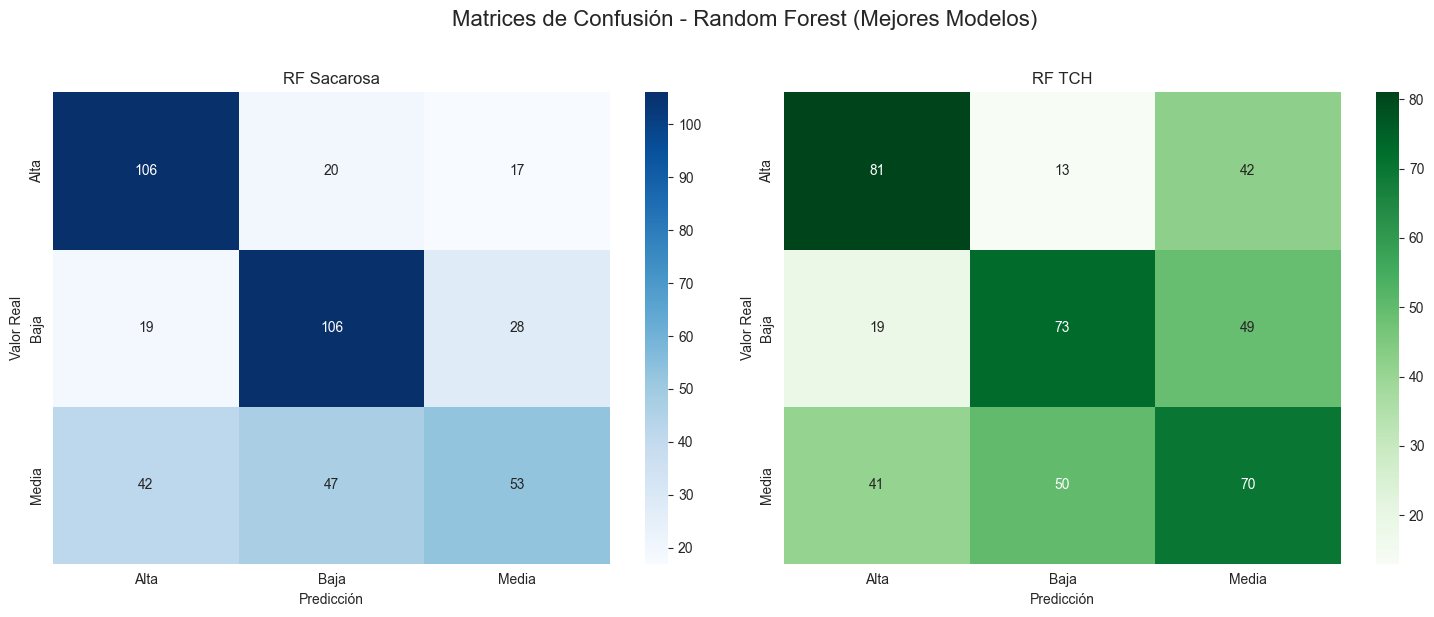

In [15]:
# 10. Matrices de Confusión para los mejores modelos
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Matrices de Confusión - Random Forest (Mejores Modelos)', fontsize=16, y=1.02)

# Matriz de confusión para RF Sacarosa
cm_rf_sac = confusion_matrix(y_test_sac, y_pred_rf_sac, labels=['Alta', 'Baja', 'Media'])
sns.heatmap(cm_rf_sac, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Alta', 'Baja', 'Media'],
           yticklabels=['Alta', 'Baja', 'Media'],
           ax=axes[0])
axes[0].set_title('RF Sacarosa')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Matriz de confusión para RF TCH
cm_rf_tch = confusion_matrix(y_test_tch, y_pred_rf_tch, labels=['Alta', 'Baja', 'Media'])
sns.heatmap(cm_rf_tch, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Alta', 'Baja', 'Media'],
           yticklabels=['Alta', 'Baja', 'Media'],
           ax=axes[1])
axes[1].set_title('RF TCH')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

In [16]:
# 11. Curvas ROC para clasificación multiclase
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Obtener probabilidades de predicción para todos los modelos
y_prob_lr_sac = lr_sac.predict_proba(X_test)
y_prob_lr_tch = lr_tch.predict_proba(X_test)
y_prob_knn_sac = grid_knn_sac.best_estimator_.predict_proba(X_test)
y_prob_knn_tch = grid_knn_tch.best_estimator_.predict_proba(X_test)

# Binarizar las etiquetas para ROC multiclase
classes = ['Alta', 'Baja', 'Media']
y_test_sac_bin = label_binarize(y_test_sac, classes=classes)
y_test_tch_bin = label_binarize(y_test_tch, classes=classes)

print("Probabilidades obtenidas para curvas ROC")
print(f"Shape probabilidades: {y_prob_lr_sac.shape}")
print("Procediendo a calcular AUC para cada clase...")

Probabilidades obtenidas para curvas ROC
Shape probabilidades: (438, 3)
Procediendo a calcular AUC para cada clase...


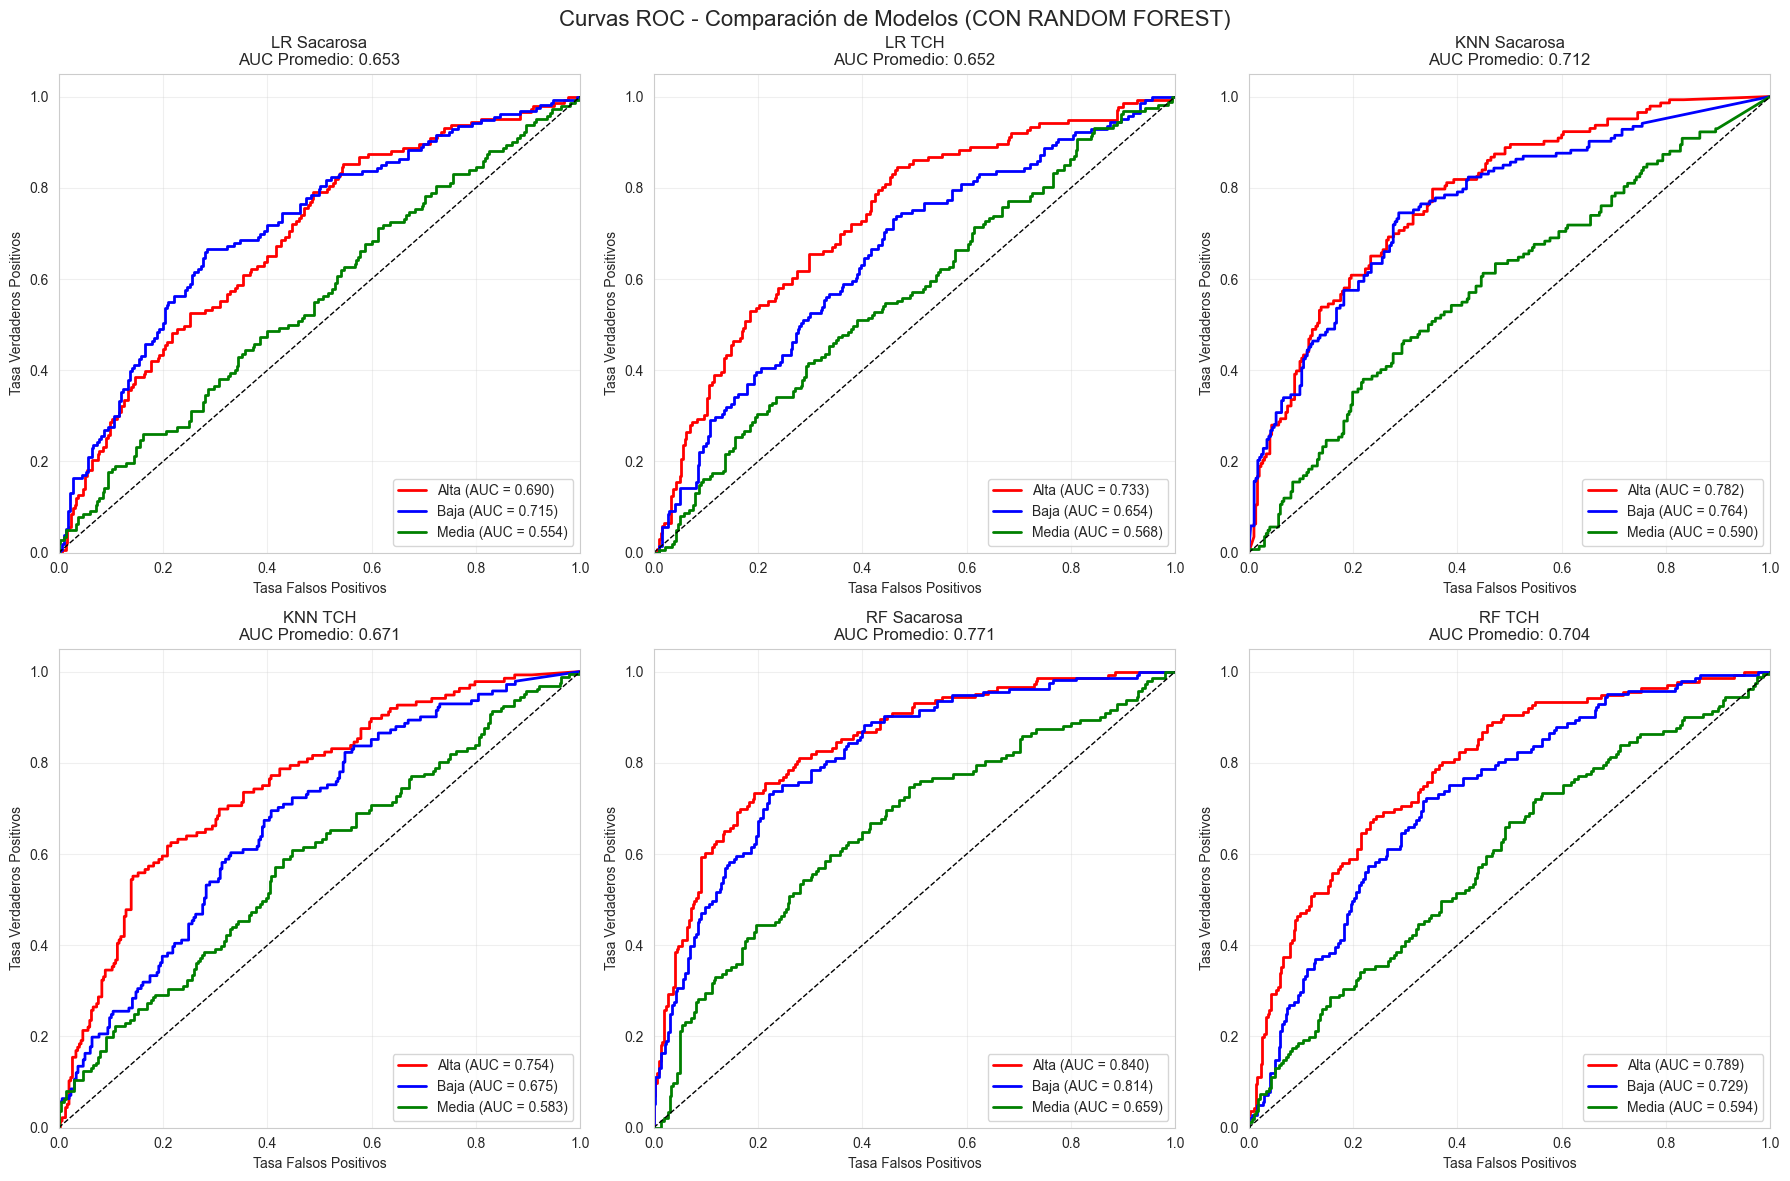

=== RESUMEN AUC PROMEDIO (CON RANDOM FOREST) ===
    LR Sacarosa: 0.653
         LR TCH: 0.652
   KNN Sacarosa: 0.712
        KNN TCH: 0.671
    RF Sacarosa: 0.771
         RF TCH: 0.704


In [17]:
# 12. Curvas ROC para clasificación multiclase
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Obtener probabilidades de predicción para TODOS los modelos
y_prob_lr_sac = lr_sac.predict_proba(X_test)
y_prob_lr_tch = lr_tch.predict_proba(X_test)
y_prob_knn_sac = grid_knn_sac.predict_proba(X_test)
y_prob_knn_tch = grid_knn_tch.predict_proba(X_test)
y_prob_rf_sac = grid_rf_sac.predict_proba(X_test)
y_prob_rf_tch = grid_rf_tch.predict_proba(X_test)

# Binarizar las etiquetas para ROC multiclase
classes = ['Alta', 'Baja', 'Media']
y_test_sac_bin = label_binarize(y_test_sac, classes=classes)
y_test_tch_bin = label_binarize(y_test_tch, classes=classes)

# Graficar curvas ROC para TODOS los modelos (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Curvas ROC - Comparación de Modelos (CON RANDOM FOREST)', fontsize=16)

# Lista de modelos y datos
modelos = [
    (y_prob_lr_sac, y_test_sac_bin, "LR Sacarosa", axes[0,0]),
    (y_prob_lr_tch, y_test_tch_bin, "LR TCH", axes[0,1]),
    (y_prob_knn_sac, y_test_sac_bin, "KNN Sacarosa", axes[0,2]),
    (y_prob_knn_tch, y_test_tch_bin, "KNN TCH", axes[1,0]),
    (y_prob_rf_sac, y_test_sac_bin, "RF Sacarosa", axes[1,1]),
    (y_prob_rf_tch, y_test_tch_bin, "RF TCH", axes[1,2])
]

colors = ['red', 'blue', 'green']
class_names = ['Alta', 'Baja', 'Media']

for y_prob, y_test_bin, titulo, ax in modelos:
    # Calcular ROC para cada clase
    aucs = []
    for i, (color, class_name) in enumerate(zip(colors, class_names)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, color=color, linewidth=2,
                label=f'{class_name} (AUC = {roc_auc:.3f})')

    # Línea diagonal
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa Falsos Positivos')
    ax.set_ylabel('Tasa Verdaderos Positivos')
    ax.set_title(f'{titulo}\nAUC Promedio: {np.mean(aucs):.3f}')
    ax.legend(loc="lower right")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen AUC
print("=== RESUMEN AUC PROMEDIO (CON RANDOM FOREST) ===")
for y_prob, y_test_bin, titulo, _ in modelos:
    aucs = []
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        aucs.append(auc(fpr, tpr))
    print(f"{titulo:>15}: {np.mean(aucs):.3f}")

In [18]:
# 13. Validación cruzada robusta para confirmar resultados
from sklearn.model_selection import cross_validate, StratifiedKFold

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

print("=== VALIDACIÓN CRUZADA (5-FOLD) CON RANDOM FOREST ===")
print(f"{'Modelo':>15} {'Variable':>10} {'CV_Accuracy':>12} {'CV_F1':>8} {'Std':>6}")
print("-" * 60)

# Validación cruzada para cada modelo
modelos = [
    (lr_sac, 'LR', 'Sacarosa', y_sacarosa),
    (lr_tch, 'LR', 'TCH', y_tch),
    (grid_knn_sac.best_estimator_, 'KNN', 'Sacarosa', y_sacarosa),
    (grid_knn_tch.best_estimator_, 'KNN', 'TCH', y_tch),
    (grid_rf_sac.best_estimator_, 'RF', 'Sacarosa', y_sacarosa),
    (grid_rf_tch.best_estimator_, 'RF', 'TCH', y_tch)
]

resultados_cv = []
for modelo, tipo, variable, y_target in modelos:
    cv_results = cross_validate(modelo, X, y_target, cv=cv, scoring=scoring)

    acc_mean = cv_results['test_accuracy'].mean()
    acc_std = cv_results['test_accuracy'].std()
    f1_mean = cv_results['test_f1_macro'].mean()

    print(f"{tipo:>15} {variable:>10} {acc_mean:>12.3f} {f1_mean:>8.3f} {acc_std:>6.3f}")
    resultados_cv.append((tipo, variable, acc_mean, f1_mean))

print("\n=== COMPARACIÓN: HOLDOUT vs VALIDACIÓN CRUZADA ===")
holdout_results = [
    accuracy_score(y_test_sac, y_pred_lr_sac),
    accuracy_score(y_test_tch, y_pred_lr_tch),
    accuracy_score(y_test_sac, y_pred_knn_sac),
    accuracy_score(y_test_tch, y_pred_knn_tch),
    accuracy_score(y_test_sac, y_pred_rf_sac),
    accuracy_score(y_test_tch, y_pred_rf_tch)
]

print(f"{'Modelo':>15} {'Holdout':>10} {'CV_Mean':>10} {'Diferencia':>12}")
print("-" * 50)
for i, (tipo, variable, cv_acc, cv_f1) in enumerate(resultados_cv):
    diff = cv_acc - holdout_results[i]
    print(f"{tipo} {variable:>6} {holdout_results[i]:>10.3f} {cv_acc:>10.3f} {diff:>12.3f}")

# Identificar mejor modelo
mejor_cv = max(resultados_cv, key=lambda x: x[2])
print(f"\n MEJOR MODELO: {mejor_cv[0]} {mejor_cv[1]} - CV: {mejor_cv[2]:.3f}")

=== VALIDACIÓN CRUZADA (5-FOLD) CON RANDOM FOREST ===
         Modelo   Variable  CV_Accuracy    CV_F1    Std
------------------------------------------------------------
             LR   Sacarosa        0.472    0.466  0.011
             LR        TCH        0.467    0.466  0.023
            KNN   Sacarosa        0.512    0.508  0.017
            KNN        TCH        0.489    0.491  0.022
             RF   Sacarosa        0.570    0.558  0.018
             RF        TCH        0.531    0.533  0.034

=== COMPARACIÓN: HOLDOUT vs VALIDACIÓN CRUZADA ===
         Modelo    Holdout    CV_Mean   Diferencia
--------------------------------------------------
LR Sacarosa      0.486      0.472       -0.014
LR    TCH      0.475      0.467       -0.008
KNN Sacarosa      0.530      0.512       -0.018
KNN    TCH      0.489      0.489        0.001
RF Sacarosa      0.605      0.570       -0.035
RF    TCH      0.511      0.531        0.019

 MEJOR MODELO: RF Sacarosa - CV: 0.570
